In [1]:
# Decision Tree Induction using sklearn

In [119]:
import pandas as pd

# read train dataset
train = pd.read_csv("train.csv")

# check the train data
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
# Build a decision tree model (using sklearn) 
# to predict class label survived using the attributes , Sex, Age and Pclass 

# Note : Sex is categorical and Age & Pcclass are numeric

# x is Sex, age, pclass
# y is Survived with class label 1 or 0

# Hence convert categorical value into numerical i.e train["numSex"]

train['Sex'] = pd.Categorical(train["Sex"])
train["numSex"] = train["Sex"].cat.codes

# Also it contains null / blank values. Fill it with the mean
train.fillna(train.mean(), inplace=True)

x = train[["numSex", "Age", "Pclass"]]
y = train["Survived"]

# Split 30% test 70% Train Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

dtree.fit(x_train, y_train)
# and done

DecisionTreeClassifier(max_depth=3)

In [121]:
res = dtree.predict(x_test)
res

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [122]:
# Predict the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, res)
acc 

0.8059701492537313

In [111]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, res)
con

array([[138,  19],
       [ 33,  78]], dtype=int64)

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(83.7, 135.9, 'X[2] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 2.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.054\nsamples = 108\nvalue = [3, 105]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 36.5\ngini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 Text(104.625, 27.180000000000007, 'gini = 0.5\nsamples = 95\nvalue = [46, 49]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 6.5\ngini = 0.302\nsamples = 410\nvalue = [334, 76]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(230.175

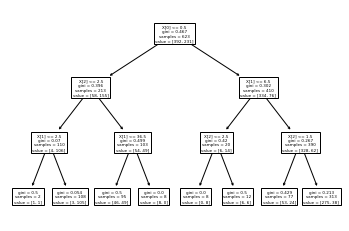

In [112]:
from sklearn import tree
tree.plot_tree(dtree)